In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import numpy as np
%matplotlib inline
plt.ioff()
import pandas as pd

In [3]:
df = pd.read_csv('US_births_2000-2014_SSA.csv')

# 1. Day of Week Analysis

In [7]:
data = df.groupby('day_of_week').births.mean().reset_index()

In [8]:
data

,day_of_week,births
0,1,11897.830140
1,2,13122.444444
2,3,12910.766284
3,4,12845.826087
4,5,12596.162404
5,6,8562.573436
6,7,7518.376756


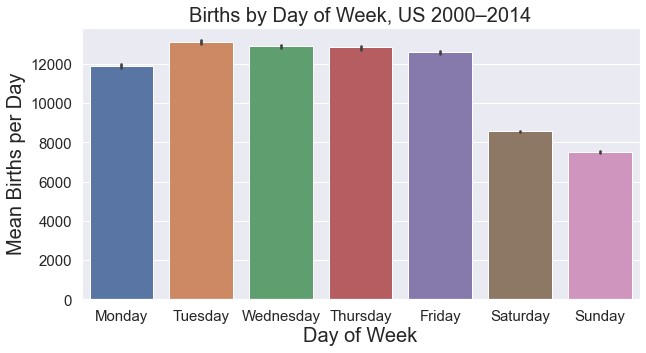

In [18]:
font_dict = {'fontsize' : 20}
fig, ax = plt.subplots(figsize = (10, 5))
sns.barplot(
  data = df,
  x = 'day_of_week',
  y = 'births',
  ci = 99
)

ax.set_xlabel('Day of Week', fontdict = font_dict)
ax.set_xticklabels([
  'Monday',
  'Tuesday',
  'Wednesday',
  'Thursday',
  'Friday',
  'Saturday',
  'Sunday'
])
ax.set_ylabel('Mean Births per Day', fontdict = font_dict)
ax.set_title('Births by Day of Week, US 2000–2014', fontdict = font_dict)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
fig.savefig('outputs/dow.png')

plt.show()

# 2. KL–Div Analysis

In [19]:
from scipy.special import rel_entr as kl_div

In [26]:
# The Overall Distribution
empirical_p = (
  df.groupby(['month', 'date_of_month'])
    .births
    .sum()
    .rename('p_empirical')
)

empirical_p /= empirical_p.sum()

In [28]:
# The Distribution for Each Year

In [54]:
# Compute the Probability for Each Year
yearly_p = (
  df.set_index(['month', 'date_of_month', 'year'])
    .groupby('year')
    .births
    .transform(lambda series : series/series.sum())
    .rename('p_yearly')
)

# Compute the Probability if that year were uniform (either 1/355 or 1/356)
uniform_p = 1 / (~yearly_p.unstack('year').isna()).sum().rename('p_uniform')
yearly_p = pd.DataFrame(yearly_p).join(uniform_p)

# Compute the KL-Divergence

In [55]:
yearly_p

p_yearly  p_uniform
month date_of_month year                     
1     1             2000  0.002189   0.002732
      2             2000  0.001929   0.002732
      3             2000  0.002738   0.002732
      4             2000  0.003141   0.002732
      5             2000  0.003026   0.002732
...                            ...        ...
12    27            2014  0.002158   0.002740
      28            2014  0.001926   0.002740
      29            2014  0.003194   0.002740
      30            2014  0.003400   0.002740
      31            2014  0.002990   0.002740

[5479 rows x 2 columns]

Do a KL-Div analysis

Year-by-year analysis instead of overall (expect more skew)